In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [51]:
df = pd.read_csv("diabetes.csv") # Reading the Data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


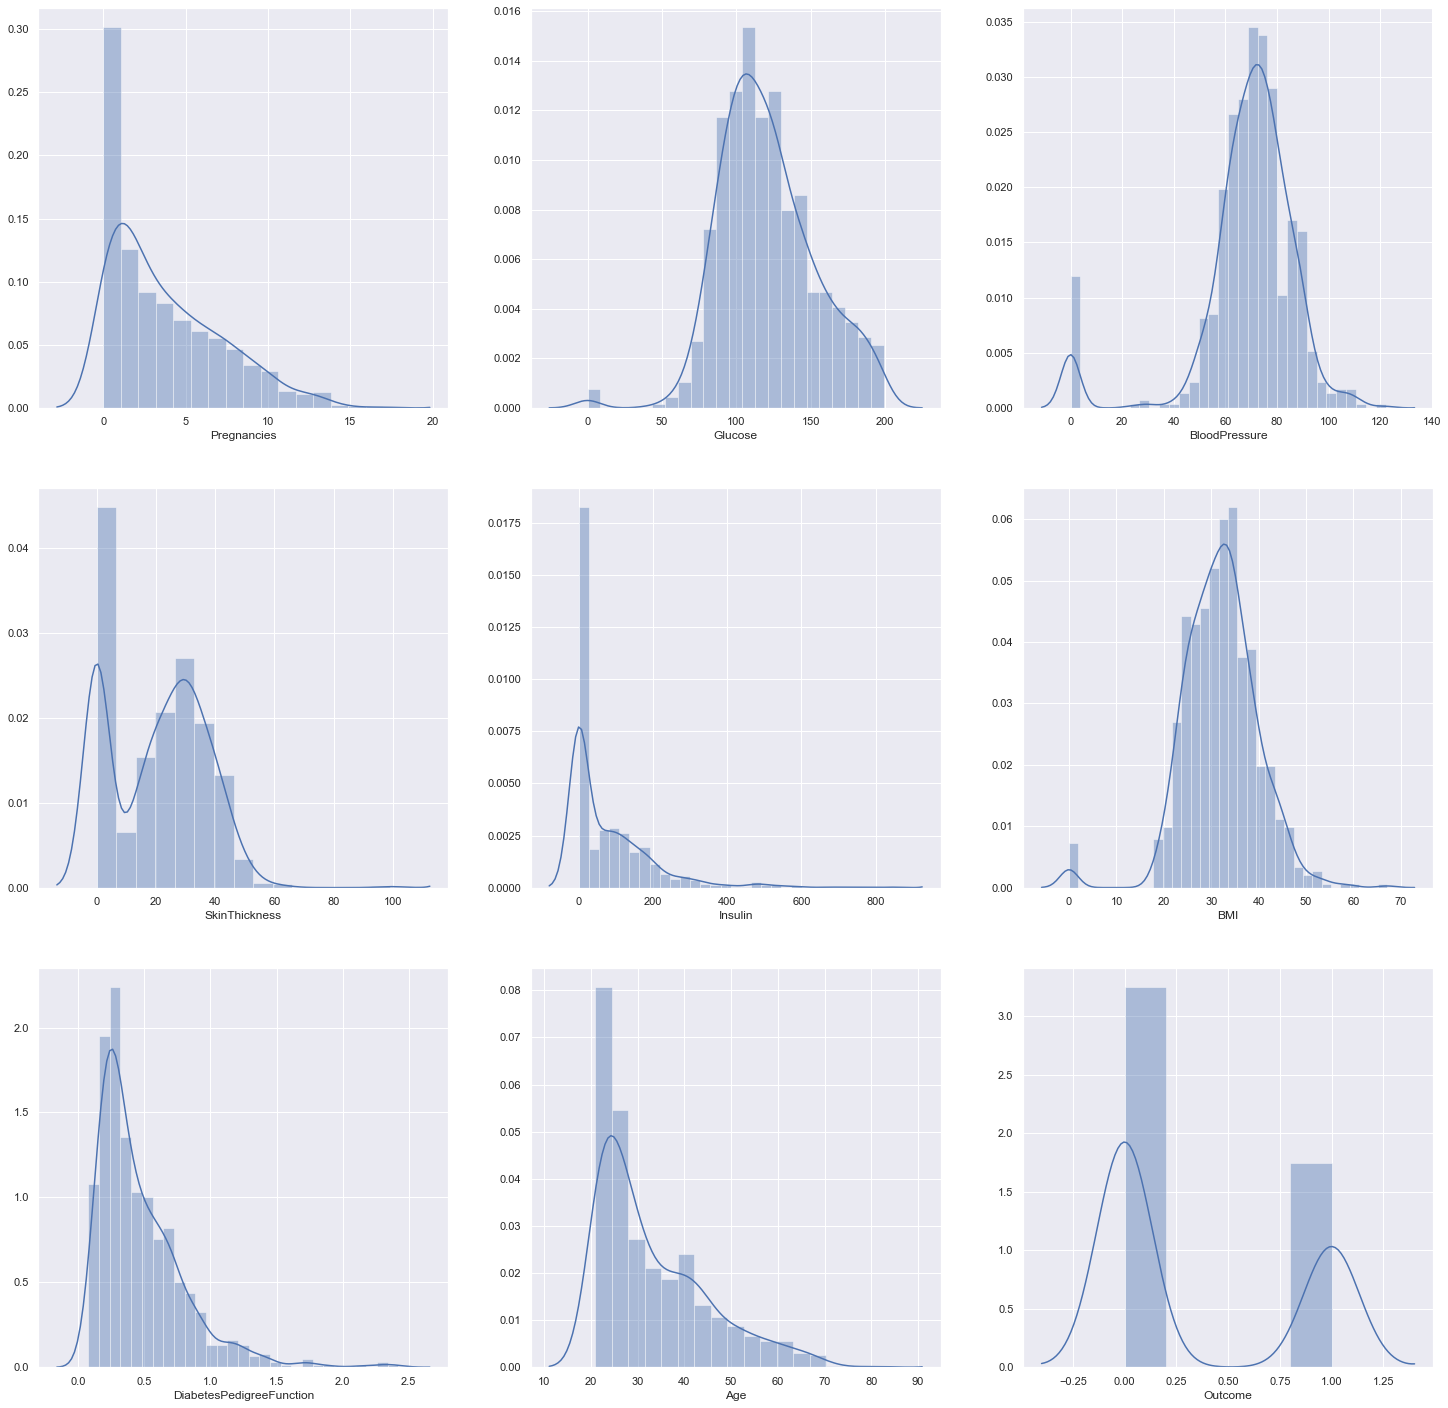

In [53]:
plt.figure(figsize=(25,25))
pltnumber=1
for i in df:
    ax=plt.subplot(3,3,pltnumber)
    sns.distplot(df[i])
    pltnumber+=1

In [54]:
#we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0.

In [106]:
# replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

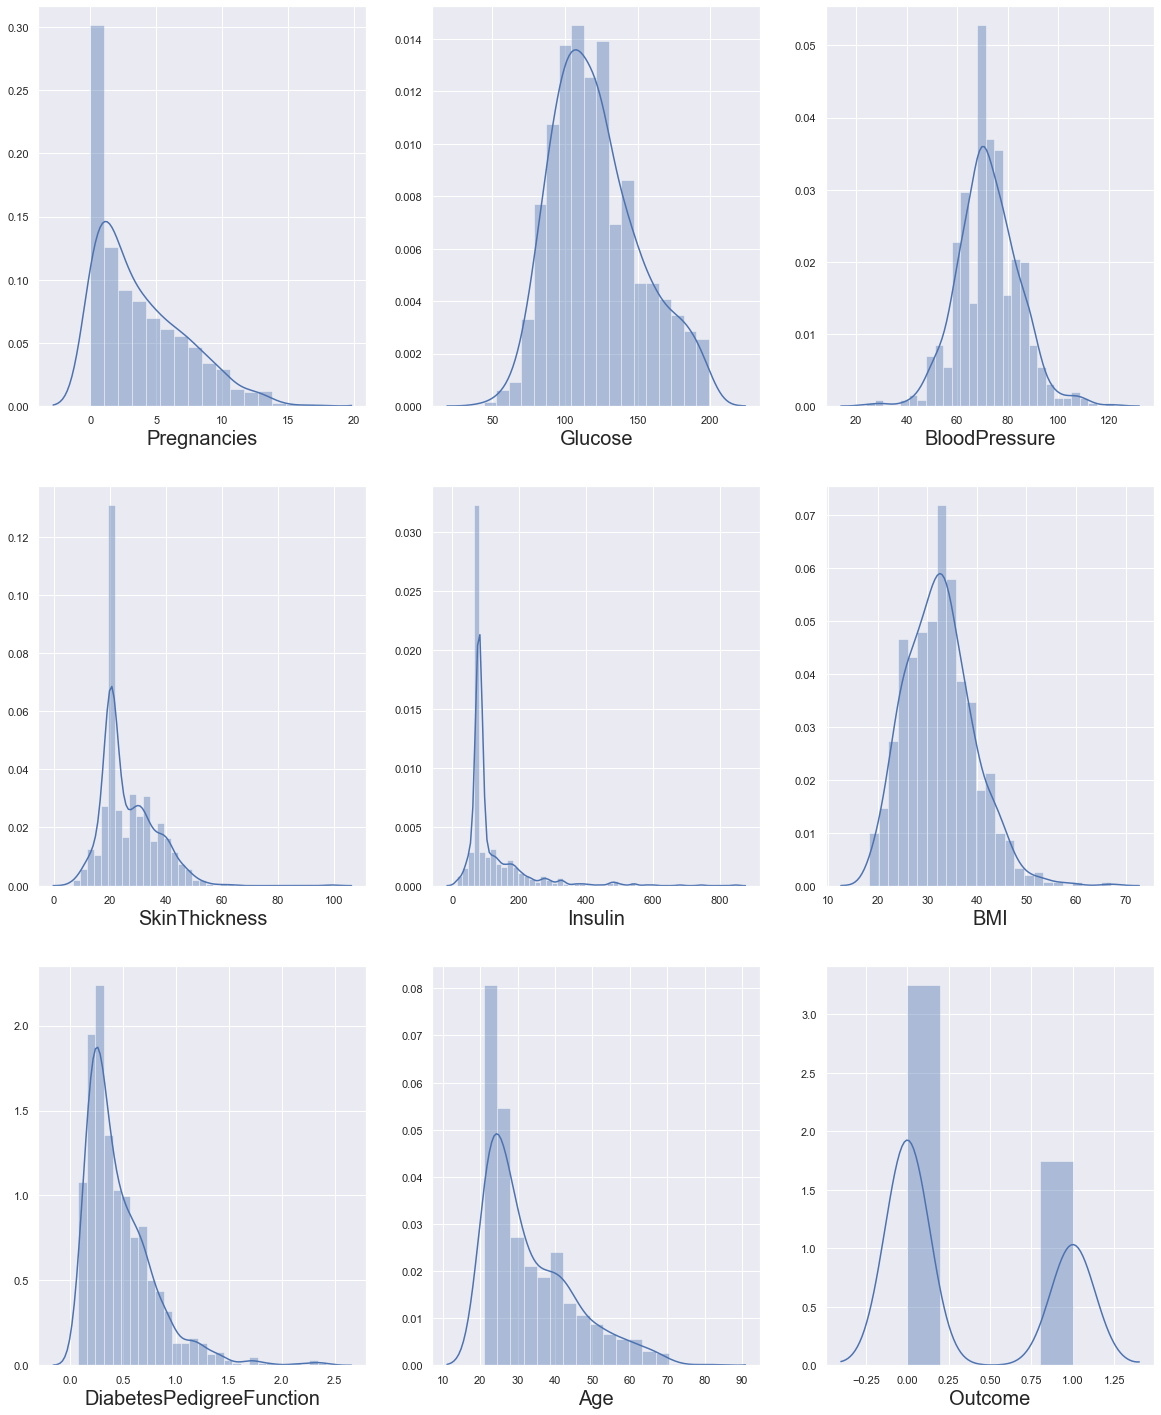

In [107]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

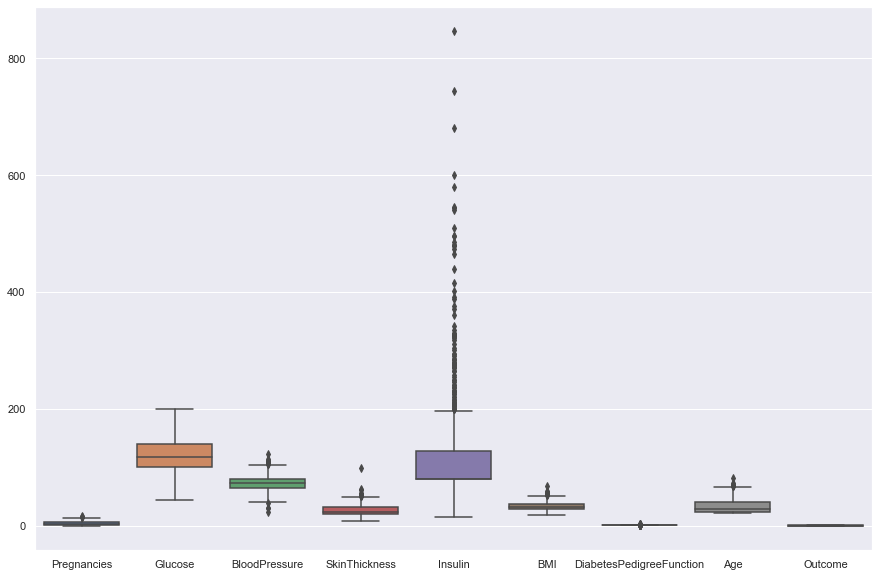

In [108]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax)

In [109]:
q=df['Glucose'].quantile(1)
print(q)

199.0


In [110]:
df.shape

(768, 9)

In [111]:
q = df['Pregnancies'].quantile(0.98)
data_cleaned=df[df['Pregnancies']<q]

In [112]:
df.shape

(768, 9)

In [113]:
data_cleaned.shape

(745, 9)

In [114]:
q = data_cleaned['BMI'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['BMI']<q]

In [115]:
data_cleaned.shape

(737, 9)

In [116]:
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

In [117]:
data_cleaned.shape

(674, 9)

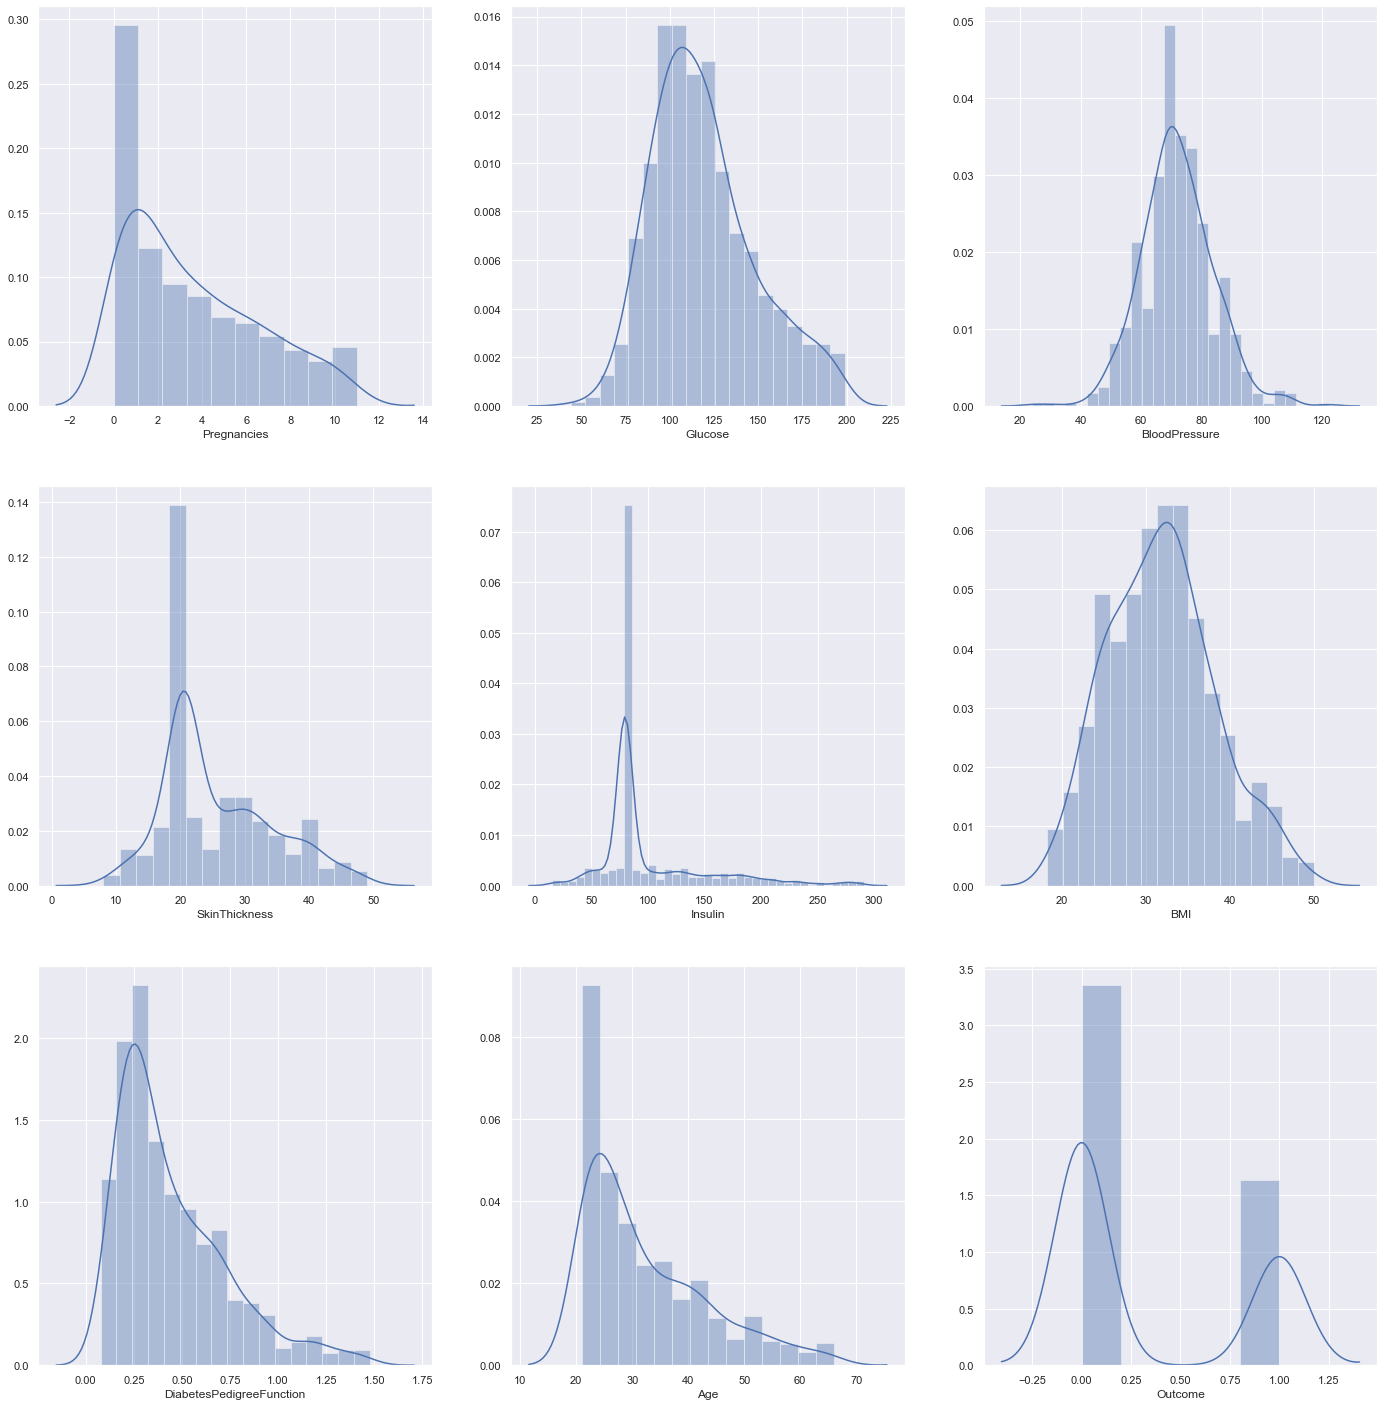

In [118]:
plt.figure(figsize=(24,25))
n=1
for i in data_cleaned:
    ax=plt.subplot(3,3,n)
    sns.distplot(data_cleaned[i])
    n+=1

In [120]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [124]:
#how to check balanced or imbalanced dataset

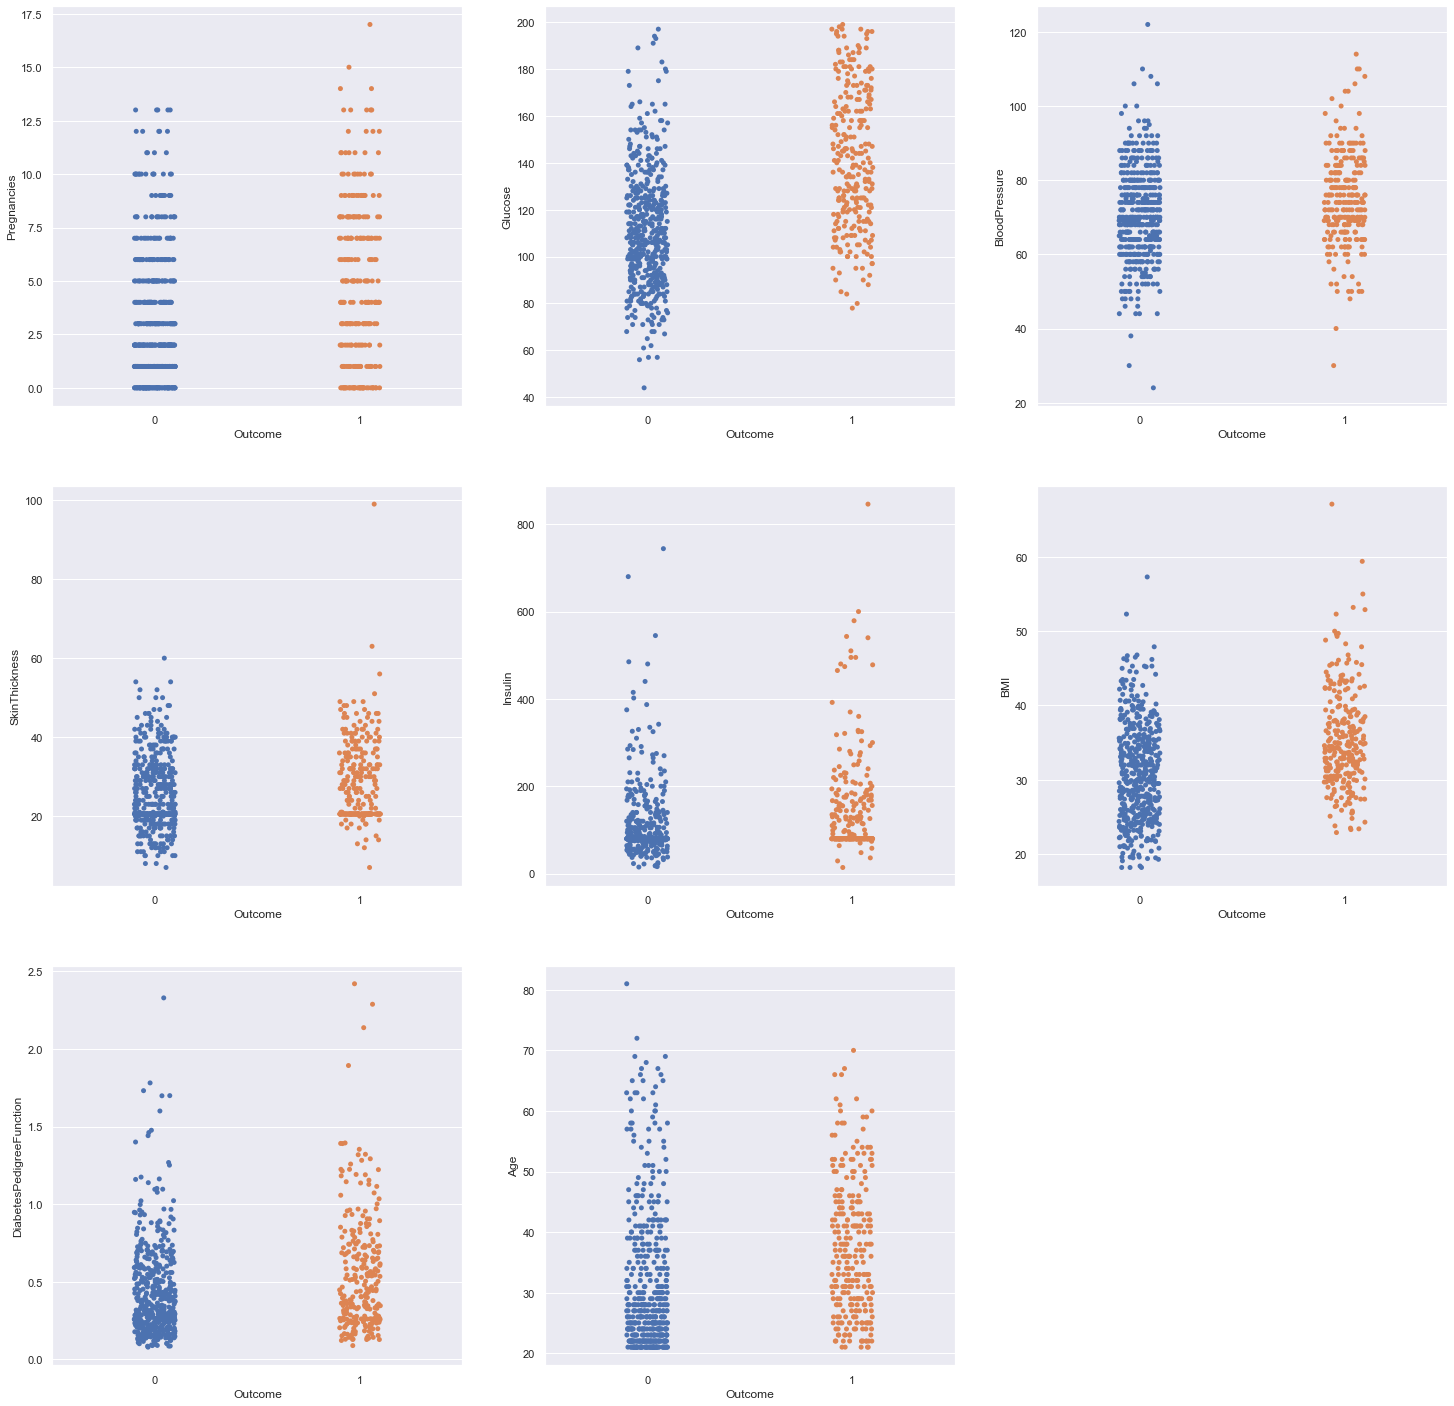

In [123]:
plt.figure(figsize=(25,25))

n=1
for i in X:
    ax=plt.subplot(3,3,n)
    sns.stripplot(y,X[i])
    n+=1
    

In [126]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [127]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [128]:
data_cleaned['Outcome'].value_counts()

0    453
1    221
Name: Outcome, dtype: int64

In [129]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [131]:
X_scaled.shape[1]

8

In [134]:
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

vif["Features"] = X.columns
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [135]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [136]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [137]:
y_pred = knn.predict(x_test)

In [138]:
knn.score(x_train,y_train)

0.8177083333333334

In [139]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.7135416666666666


In [140]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [141]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [142]:
knn.score(x_train,y_train)

0.7934027777777778

In [143]:
knn.score(x_test,y_test)

0.7447916666666666